In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
notebook_path = '/content/notebooks'
os.symlink('content/mnt/My Drive/Colab Notebooks', notebook_path)
sys.path.insert(0, notebook_path)

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [3]:
cd mnt/MyDrive/Colab\ Notebooks

/content/mnt/MyDrive/Colab Notebooks


In [4]:
cd data

/content/mnt/MyDrive/Colab Notebooks/data


In [5]:
ls

train/  train.json


In [6]:
import json
json_data = json.load(open('train.json'))

In [7]:
json_data.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [8]:
json_data['categories']

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

In [9]:
json_data['images'][1]

{'coco_url': None,
 'date_captured': '2021-01-10 16:30:39',
 'file_name': 'train/0001.jpg',
 'flickr_url': None,
 'height': 1024,
 'id': 1,
 'license': 0,
 'width': 1024}

In [10]:
json_data['annotations'][0]

{'area': 257301.66,
 'bbox': [197.6, 193.7, 547.8, 469.7],
 'category_id': 0,
 'id': 0,
 'image_id': 0,
 'iscrowd': 0}

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

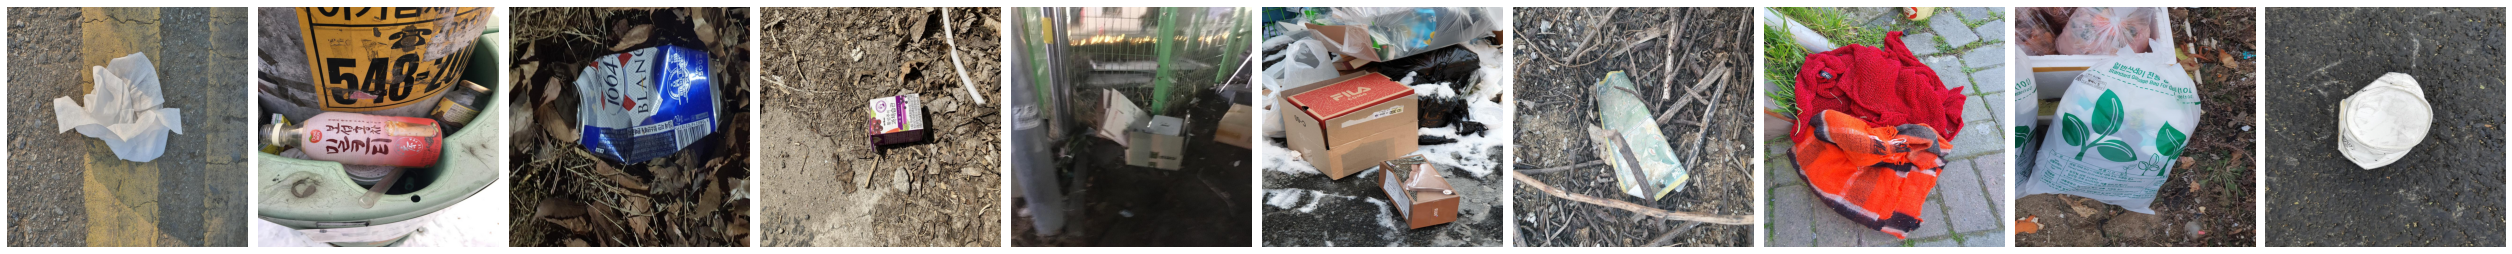

In [12]:
fig = plt.figure(figsize=(35, 20))

for i in range(10):
    image = cv2.imread(json_data["images"][i]["file_name"])
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')


plt.tight_layout()
plt.show()

In [13]:
for i in range(10):
    print(json_data['annotations'][i])

{'image_id': 0, 'category_id': 0, 'area': 257301.66, 'bbox': [197.6, 193.7, 547.8, 469.7], 'iscrowd': 0, 'id': 0}
{'image_id': 1, 'category_id': 3, 'area': 10402.56, 'bbox': [0.0, 407.4, 57.6, 180.6], 'iscrowd': 0, 'id': 1}
{'image_id': 1, 'category_id': 7, 'area': 26259.36, 'bbox': [0.0, 455.6, 144.6, 181.6], 'iscrowd': 0, 'id': 2}
{'image_id': 1, 'category_id': 4, 'area': 69096.17, 'bbox': [722.3, 313.4, 274.3, 251.9], 'iscrowd': 0, 'id': 3}
{'image_id': 1, 'category_id': 5, 'area': 24164.58, 'bbox': [353.2, 671.0, 233.7, 103.4], 'iscrowd': 0, 'id': 4}
{'image_id': 1, 'category_id': 5, 'area': 188324.4, 'bbox': [3.7, 448.5, 778.2, 242.0], 'iscrowd': 0, 'id': 5}
{'image_id': 1, 'category_id': 0, 'area': 38908.72, 'bbox': [425.3, 681.9, 216.4, 179.8], 'iscrowd': 0, 'id': 6}
{'image_id': 1, 'category_id': 7, 'area': 7391.52, 'bbox': [92.4, 601.7, 139.2, 53.1], 'iscrowd': 0, 'id': 7}
{'image_id': 1, 'category_id': 0, 'area': 6857.76, 'bbox': [622.4, 686.5, 72.8, 94.2], 'iscrowd': 0, 'id'

In [14]:
categories = []
for cat in json_data['categories']:
    categories.append(cat['name'])

amounts = [0] * 10
for ann in json_data['annotations']:
    amounts[ann['category_id']] += 1

In [15]:
print(sum(amounts))
print(amounts)
print(categories)

23144
[3966, 6352, 897, 936, 982, 2943, 1263, 5178, 159, 468]
['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


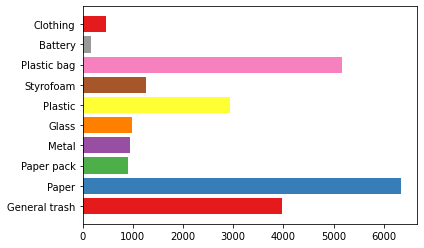

In [16]:
colors = sns.color_palette('Set1',len(categories))
plt.barh(categories, amounts, color=colors)
plt.show()

해당 데이터를 확인한 결과 상당 수의 data가 Paper에 치중된 것을 알 수 있다.<br>
특히 Battery의 data는 23144개의 data 중 159개 뿐이므로 data augmentation과<br>
다양한 테스트를 통해 이를 해소할 필요가 있다.

In [17]:
import pandas as pd

In [18]:
df_image = pd.DataFrame(json_data['images'])

In [19]:
images = {idx: info for idx, info in enumerate(df_image)}

In [20]:
df_image.head()

,width,height,file_name,license,flickr_url,coco_url,date_captured,id
0,1024,1024,train/0000.jpg,0,None,None,2020-12-26 14:44:23,0
1,1024,1024,train/0001.jpg,0,None,None,2021-01-10 16:30:39,1
2,1024,1024,train/0002.jpg,0,None,None,2020-12-27 17:55:52,2
3,1024,1024,train/0003.jpg,0,None,None,2021-03-31 12:10:36,3
4,1024,1024,train/0004.jpg,0,None,None,2021-01-01 18:52:38,4


In [21]:
df_bbox = pd.DataFrame(json_data['annotations'])

In [22]:
groupby_bbox = df_bbox.groupby('image_id')

In [23]:
groupby_bbox = {idx: group for idx, group in groupby_bbox}

In [24]:
box_counts = [0] * 5
labels = ['1', '<=5', '<=10', '<=20', '20<']
for i in range(4883):
    L = len(groupby_bbox[i])
    if L == 1:
        box_counts[0] += 1
    elif L <= 5:
        box_counts[1] += 1
    elif L <= 10:
        box_counts[2] += 1
    elif L <= 20:
        box_counts[3] += 1
    else:
        box_counts[4] += 1

box_counts

[1980, 1665, 620, 434, 184]

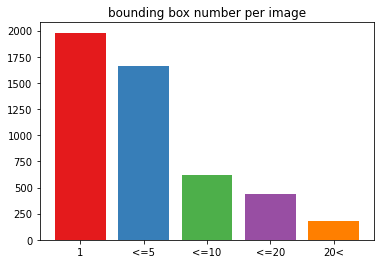

In [25]:


colors = sns.color_palette('Set1',5)
plt.title('bounding box number per image')
plt.bar(labels, box_counts, color=colors)
plt.show()

bbox가 하나인 경우가 가장 많았고, 대부분 5개 이하의 bbox를 가지고 있었다.

In [26]:
H = []
W = []

for x, y, w, h in df_bbox.bbox:
    H.append(h)
    W.append(w)

print(f'Height info| average: {sum(H)/23144:0.2f}, max: {max(H)}, min: {min(H)}')
print(f'Width info| average: {sum(W)/23144:0.2f}, max: {max(W)}, min: {min(W)}')

Height info| average: 252.24, max: 1023.9, min: 0.8
Width info| average: 257.50, max: 1023.9, min: 0.7


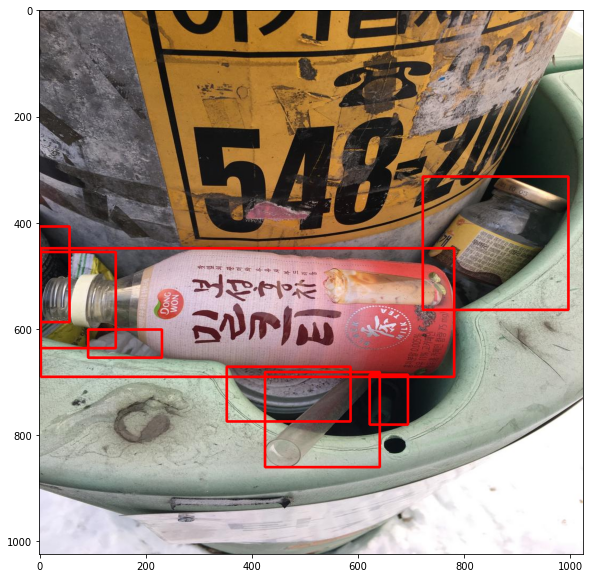

In [29]:
idx = 1
image = cv2.imread(df_image.file_name[idx])

for bbox in groupby_bbox[idx].bbox:
    x, y, w, h = map(int, bbox)
    image = cv2.rectangle(image, (x, y), (x+w, y+h), (0,0,255), 3)


plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()